In [1]:
import warnings #avoiding the red blocks of warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and preprocessing of the data

In [3]:
mig_df=pd.read_csv("Migration_data.csv")

In [4]:
mig_df

,Table name,State,District,Area Name,Last residence,Last residence.1,Place of enumeration,Total migrants,Total migrants (M),Total migrants (F),...,5-9 years(F),10-19 years,10-19 years(M),10-19 years(F),20+ years,20+ years(M),20+ years(F),Duration not stated,Duration not stated(M),Duration not stated(F)
0,NaN,NaN,NaN,NaN,NaN,Total/Rural/Urban/Country,Total/Rural/Urban,Persons,Males,Females,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
1,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Total,Total,"40,146","20,309","19,837",...,"2,848","8,753","4,301","4,452","13,650","6,838","6,812","1,865",992,873
2,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Total,Rural,269,142,127,...,21,57,28,29,84,43,41,6,5,1
3,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Total,Urban,"39,877","20,167","19,710",...,"2,827","8,696","4,273","4,423","13,566","6,795","6,771","1,859",987,872
4,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Rural,Total,"8,112","4,541","3,571",...,495,"1,748",918,830,"2,435","1,348","1,087",360,222,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,D0302,7.0,98.0,South,Andaman & Nicobar Islands,Rural,Rural,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,D0302,7.0,98.0,South,Andaman & Nicobar Islands,Rural,Urban,12,8,4,...,0,5,3,2,3,1,2,0,0,0
3148,D0302,7.0,98.0,South,Andaman & Nicobar Islands,Urban,Total,78,35,43,...,6,16,6,10,20,9,11,8,3,5
3149,D0302,7.0,98.0,South,Andaman & Nicobar Islands,Urban,Rural,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mig_df.head()

,Table name,State,District,Area Name,Last residence,Last residence.1,Place of enumeration,Total migrants,Total migrants (M),Total migrants (F),...,5-9 years(F),10-19 years,10-19 years(M),10-19 years(F),20+ years,20+ years(M),20+ years(F),Duration not stated,Duration not stated(M),Duration not stated(F)
0,NaN,NaN,NaN,NaN,NaN,Total/Rural/Urban/Country,Total/Rural/Urban,Persons,Males,Females,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
1,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Total,Total,"40,146","20,309","19,837",...,"2,848","8,753","4,301","4,452","13,650","6,838","6,812","1,865",992,873
2,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Total,Rural,269,142,127,...,21,57,28,29,84,43,41,6,5,1
3,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Total,Urban,"39,877","20,167","19,710",...,"2,827","8,696","4,273","4,423","13,566","6,795","6,771","1,859",987,872
4,D0302,7.0,0.0,State - NCT OF DELHI,Jammu & Kashmir,Rural,Total,"8,112","4,541","3,571",...,495,"1,748",918,830,"2,435","1,348","1,087",360,222,138


In [6]:
mig_df.columns

Index(['Table name', 'State', 'District', 'Area Name', 'Last residence',
       'Last residence.1', 'Place of enumeration', 'Total migrants',
       'Total migrants (M)', 'Total migrants (F)', 'Less than 1 year',
       'Less than 1 year(M)', 'Less than 1 year(F)', '1-4 years',
       '1-4 years(M)', '1-4 years(F)', '5-9 years', '5-9 years(M)',
       '5-9 years(F)', '10-19 years', '10-19 years(M)', '10-19 years(F)',
       '20+ years', '20+ years(M)', '20+ years(F)', 'Duration not stated',
       'Duration not stated(M)', 'Duration not stated(F)'],
      dtype='object')

In [7]:
#dropping the unrequired columns and replacing nan values with 0
X = mig_df.drop(['Table name','State','Area Name','Total migrants','Total migrants (M)','Total migrants (F)','Less than 1 year','Less than 1 year(M)','Less than 1 year(F)','1-4 years','1-4 years(M)','1-4 years(F)','5-9 years','5-9 years(M)','5-9 years(F)'],axis='columns').fillna(0)
X

,District,Last residence,Last residence.1,Place of enumeration,10-19 years,10-19 years(M),10-19 years(F),20+ years,20+ years(M),20+ years(F),Duration not stated,Duration not stated(M),Duration not stated(F)
0,0.0,0,Total/Rural/Urban/Country,Total/Rural/Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
1,0.0,Jammu & Kashmir,Total,Total,"8,753","4,301","4,452","13,650","6,838","6,812","1,865",992,873
2,0.0,Jammu & Kashmir,Total,Rural,57,28,29,84,43,41,6,5,1
3,0.0,Jammu & Kashmir,Total,Urban,"8,696","4,273","4,423","13,566","6,795","6,771","1,859",987,872
4,0.0,Jammu & Kashmir,Rural,Total,"1,748",918,830,"2,435","1,348","1,087",360,222,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,98.0,Andaman & Nicobar Islands,Rural,Rural,0,0,0,0,0,0,0,0,0
3147,98.0,Andaman & Nicobar Islands,Rural,Urban,5,3,2,3,1,2,0,0,0
3148,98.0,Andaman & Nicobar Islands,Urban,Total,16,6,10,20,9,11,8,3,5
3149,98.0,Andaman & Nicobar Islands,Urban,Rural,0,0,0,0,0,0,0,0,0


0 = State - NCT OF DELHI
90 = North West
91 = North
92 = North East
93 = East
94 = New Delhi
95 = Central
96 = West
97 = South West
98 = South

In [8]:
X.describe()

,District
count,3151.000000
mean,84.573151
std,28.346277
min,0.000000
25%,91.000000
50%,93.000000
75%,96.000000
max,98.000000


In [9]:
len(X)

3151

In [10]:
X.shape

(3151, 13)

In [11]:
X.info

<bound method DataFrame.info of       District             Last residence           Last residence.1  \
0          0.0                          0  Total/Rural/Urban/Country   
1          0.0            Jammu & Kashmir                      Total   
2          0.0            Jammu & Kashmir                      Total   
3          0.0            Jammu & Kashmir                      Total   
4          0.0            Jammu & Kashmir                      Rural   
...        ...                        ...                        ...   
3146      98.0  Andaman & Nicobar Islands                      Rural   
3147      98.0  Andaman & Nicobar Islands                      Rural   
3148      98.0  Andaman & Nicobar Islands                      Urban   
3149      98.0  Andaman & Nicobar Islands                      Urban   
3150      98.0  Andaman & Nicobar Islands                      Urban   

     Place of enumeration 10-19 years 10-19 years(M) 10-19 years(F) 20+ years  \
0       Total/Rural/Ur

In [12]:
X.max()

District                     98.0
Last residence.1            Urban
Place of enumeration        Urban
10-19 years               Persons
10-19 years(M)              Males
10-19 years(F)            Females
20+ years                 Persons
20+ years(M)                Males
20+ years(F)              Females
Duration not stated       Persons
Duration not stated(M)      Males
Duration not stated(F)    Females
dtype: object

In [13]:
X.min()

District                    0.0
Last residence.1          Rural
Place of enumeration      Rural
10-19 years                   0
10-19 years(M)                0
10-19 years(F)                0
20+ years                     0
20+ years(M)                  0
20+ years(F)                  0
Duration not stated           0
Duration not stated(M)        0
Duration not stated(F)        0
dtype: object

In [14]:
males10=X['10-19 years(M)'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')
females10=X['10-19 years(F)'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')
males20=X['20+ years(M)'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')
females20=X['20+ years(F)'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')
males=X['Duration not stated(M)'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')
females=X['Duration not stated(F)'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')
states=X['Last residence'].where((X['Last residence.1'] == 'Rural'),X['Place of enumeration']=='Urban')


In [15]:
print(states)

0                           False
1                           False
2                           False
3                            True
4                 Jammu & Kashmir
                  ...            
3146    Andaman & Nicobar Islands
3147    Andaman & Nicobar Islands
3148                        False
3149                        False
3150                         True
Name: Last residence, Length: 3151, dtype: object


In [16]:
print(females10)

0       False
1       False
2       False
3        True
4         830
        ...  
3146        0
3147        2
3148    False
3149    False
3150     True
Name: 10-19 years(F), Length: 3151, dtype: object


In [17]:
print(males20)

0       False
1       False
2       False
3        True
4       1,348
        ...  
3146        0
3147        1
3148    False
3149    False
3150     True
Name: 20+ years(M), Length: 3151, dtype: object


In [18]:
print(females20)

0       False
1       False
2       False
3        True
4       1,087
        ...  
3146        0
3147        2
3148    False
3149    False
3150     True
Name: 20+ years(F), Length: 3151, dtype: object


In [19]:
print(males)

0       False
1       False
2       False
3        True
4         222
        ...  
3146        0
3147        0
3148    False
3149    False
3150     True
Name: Duration not stated(M), Length: 3151, dtype: object


In [20]:
print(males)

0       False
1       False
2       False
3        True
4         222
        ...  
3146        0
3147        0
3148    False
3149    False
3150     True
Name: Duration not stated(M), Length: 3151, dtype: object


In [21]:
print(males10)

0       False
1       False
2       False
3        True
4         918
        ...  
3146        0
3147        3
3148    False
3149    False
3150     True
Name: 10-19 years(M), Length: 3151, dtype: object


In [22]:
np.arange(len(states))

array([   0,    1,    2, ..., 3148, 3149, 3150])

In [23]:
males=list(males)
states=list(states)
males=[male for male in males if male!=False and male!=True]
states=[state for state in states if state!=False and state!=True]


In [24]:
females=list(males)
states=list(states)
males=[male for male in males if male!=False and male!=True]
states=[state for state in states if state!=False and state!=True]


In [25]:
females10=list(males)
states=list(states)
males=[male for male in males if male!=False and male!=True]
states=[state for state in states if state!=False and state!=True]


In [26]:
males10=list(males)
states=list(states)
males=[male for male in males if male!=False and male!=True]
states=[state for state in states if state!=False and state!=True]


In [27]:
females20=list(males)
states=list(states)
males=[male for male in males if male!=False and male!=True]
states=[state for state in states if state!=False and state!=True]


In [28]:
males20=list(males10)
states=list(states)
males10=[male for male in males10 if male!=False and male!=True]
states=[state for state in states if state!=False and state!=True]


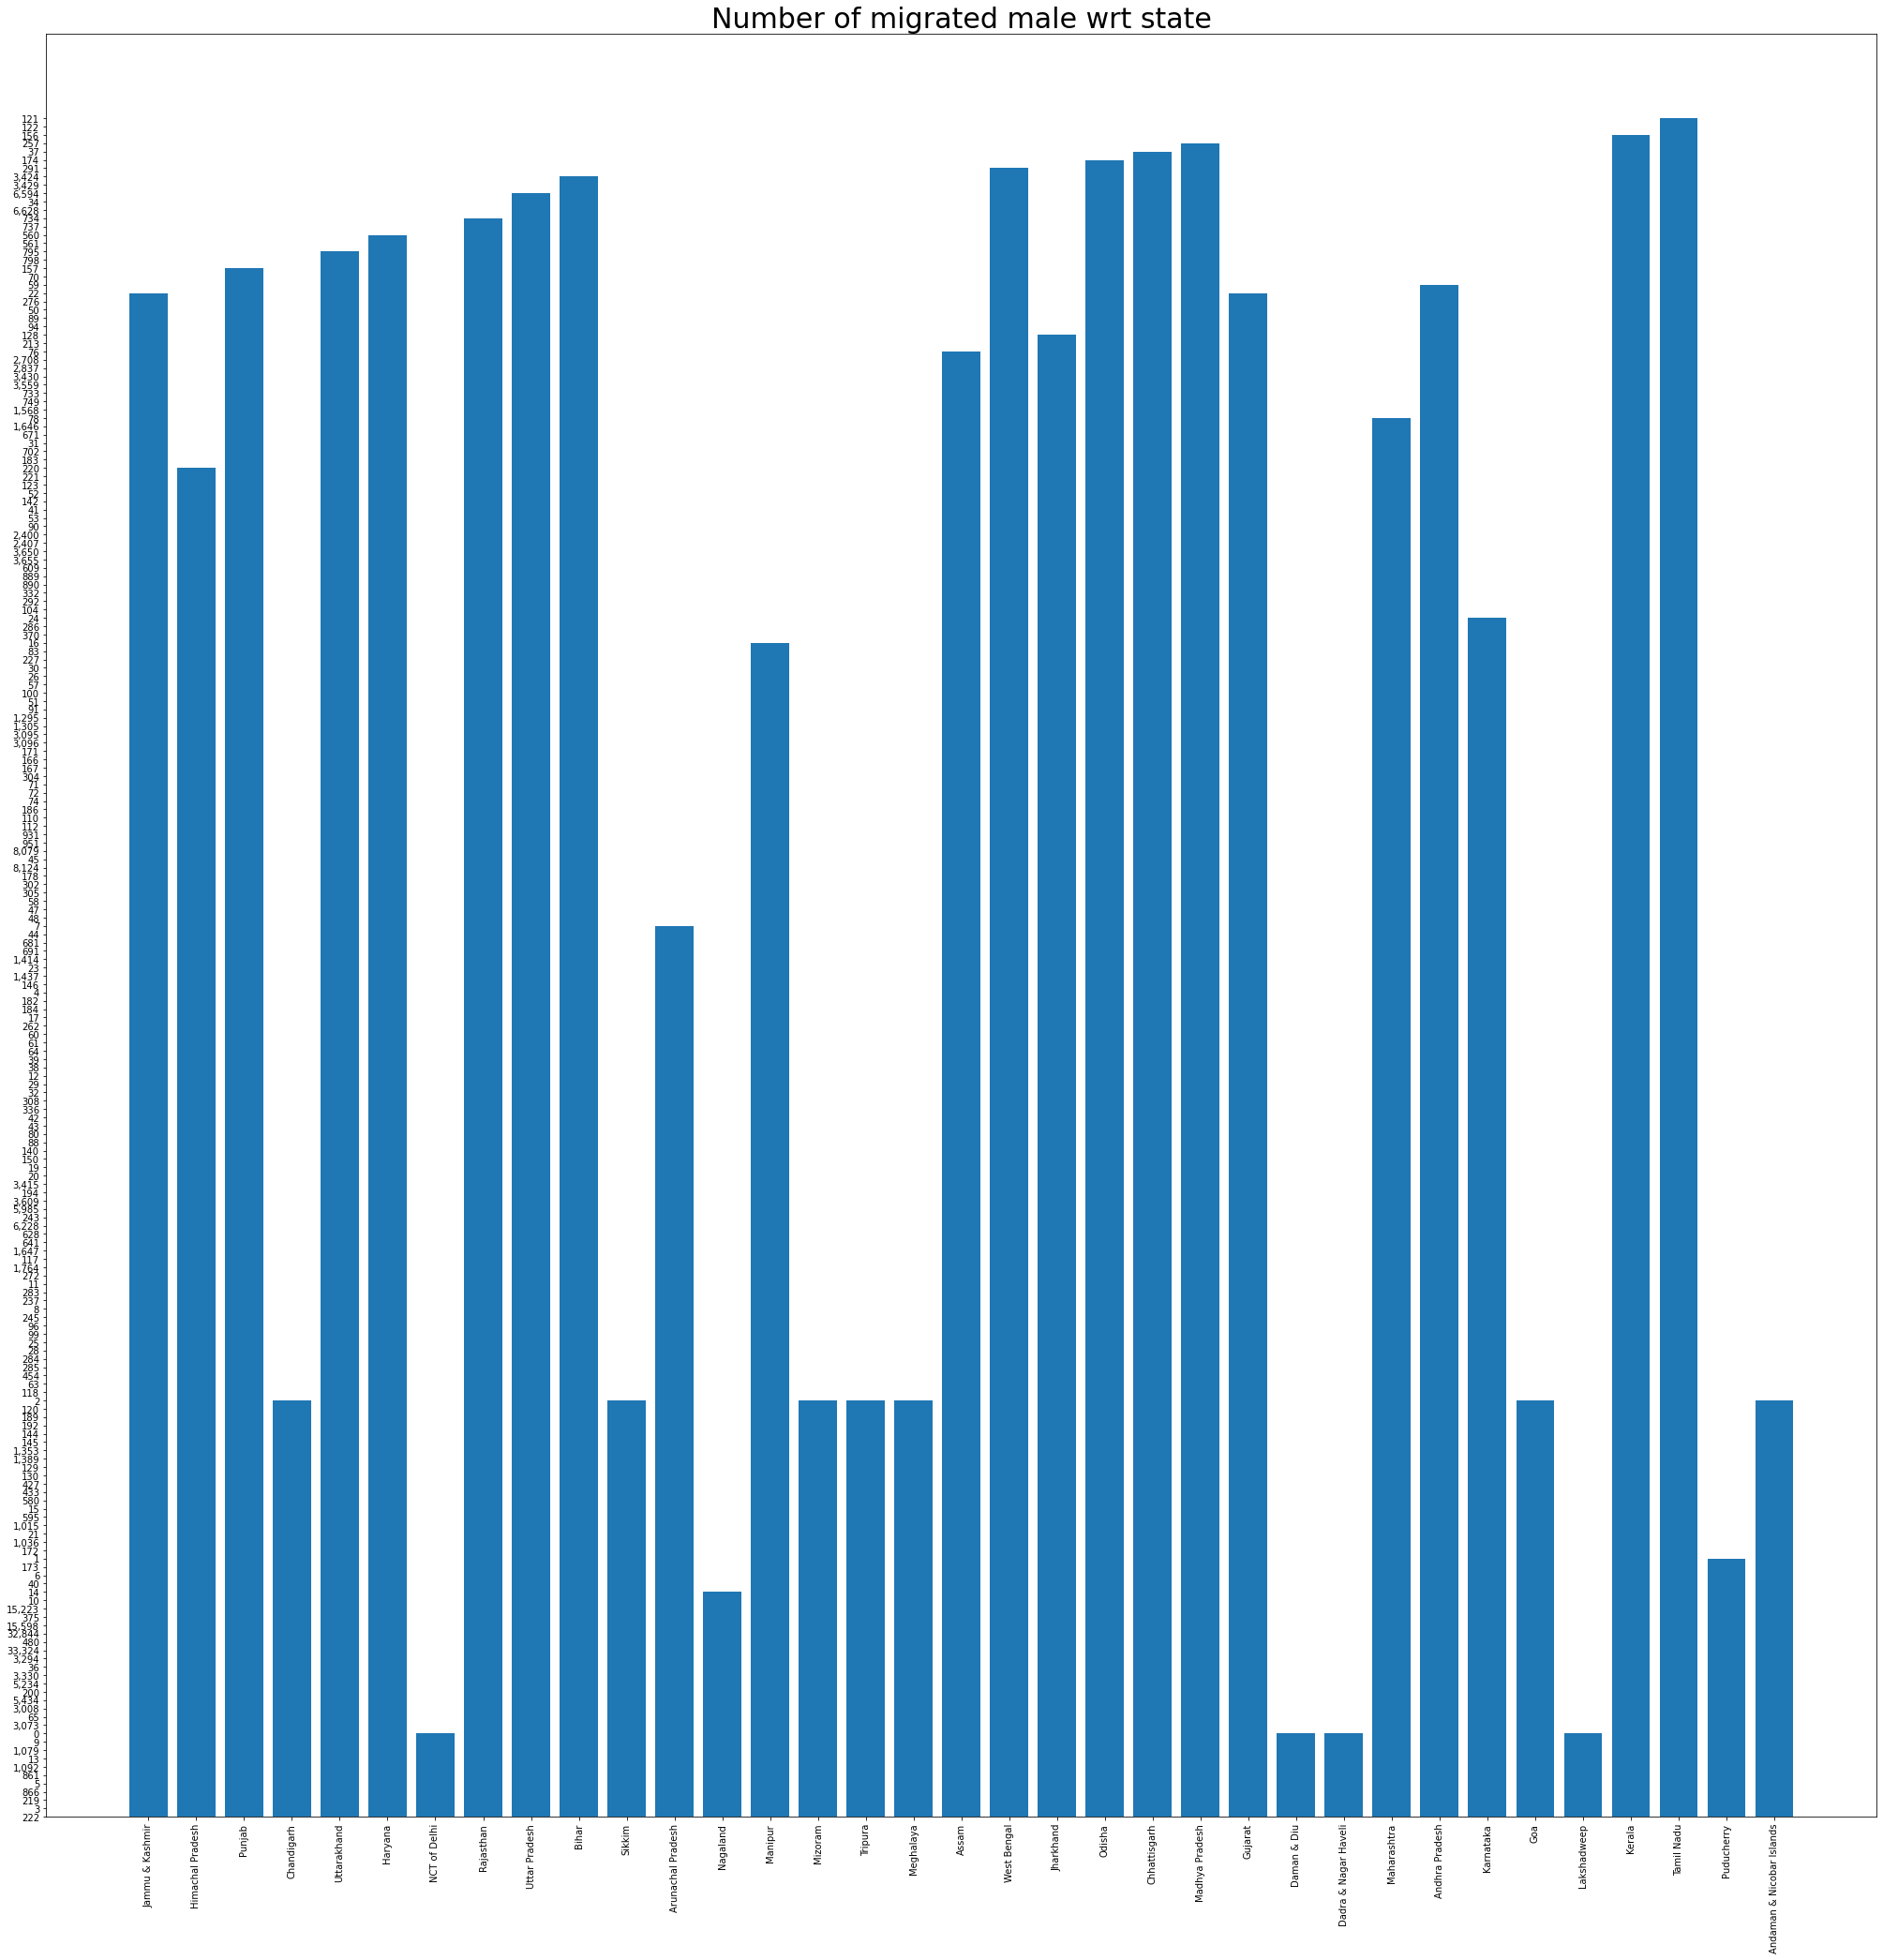

In [29]:
plt.figure(figsize=(35,35))
plt.bar(states,males)
plt.title("Number of migrated male wrt state",fontsize=30)
plt.xticks(rotation=90)
plt.show()

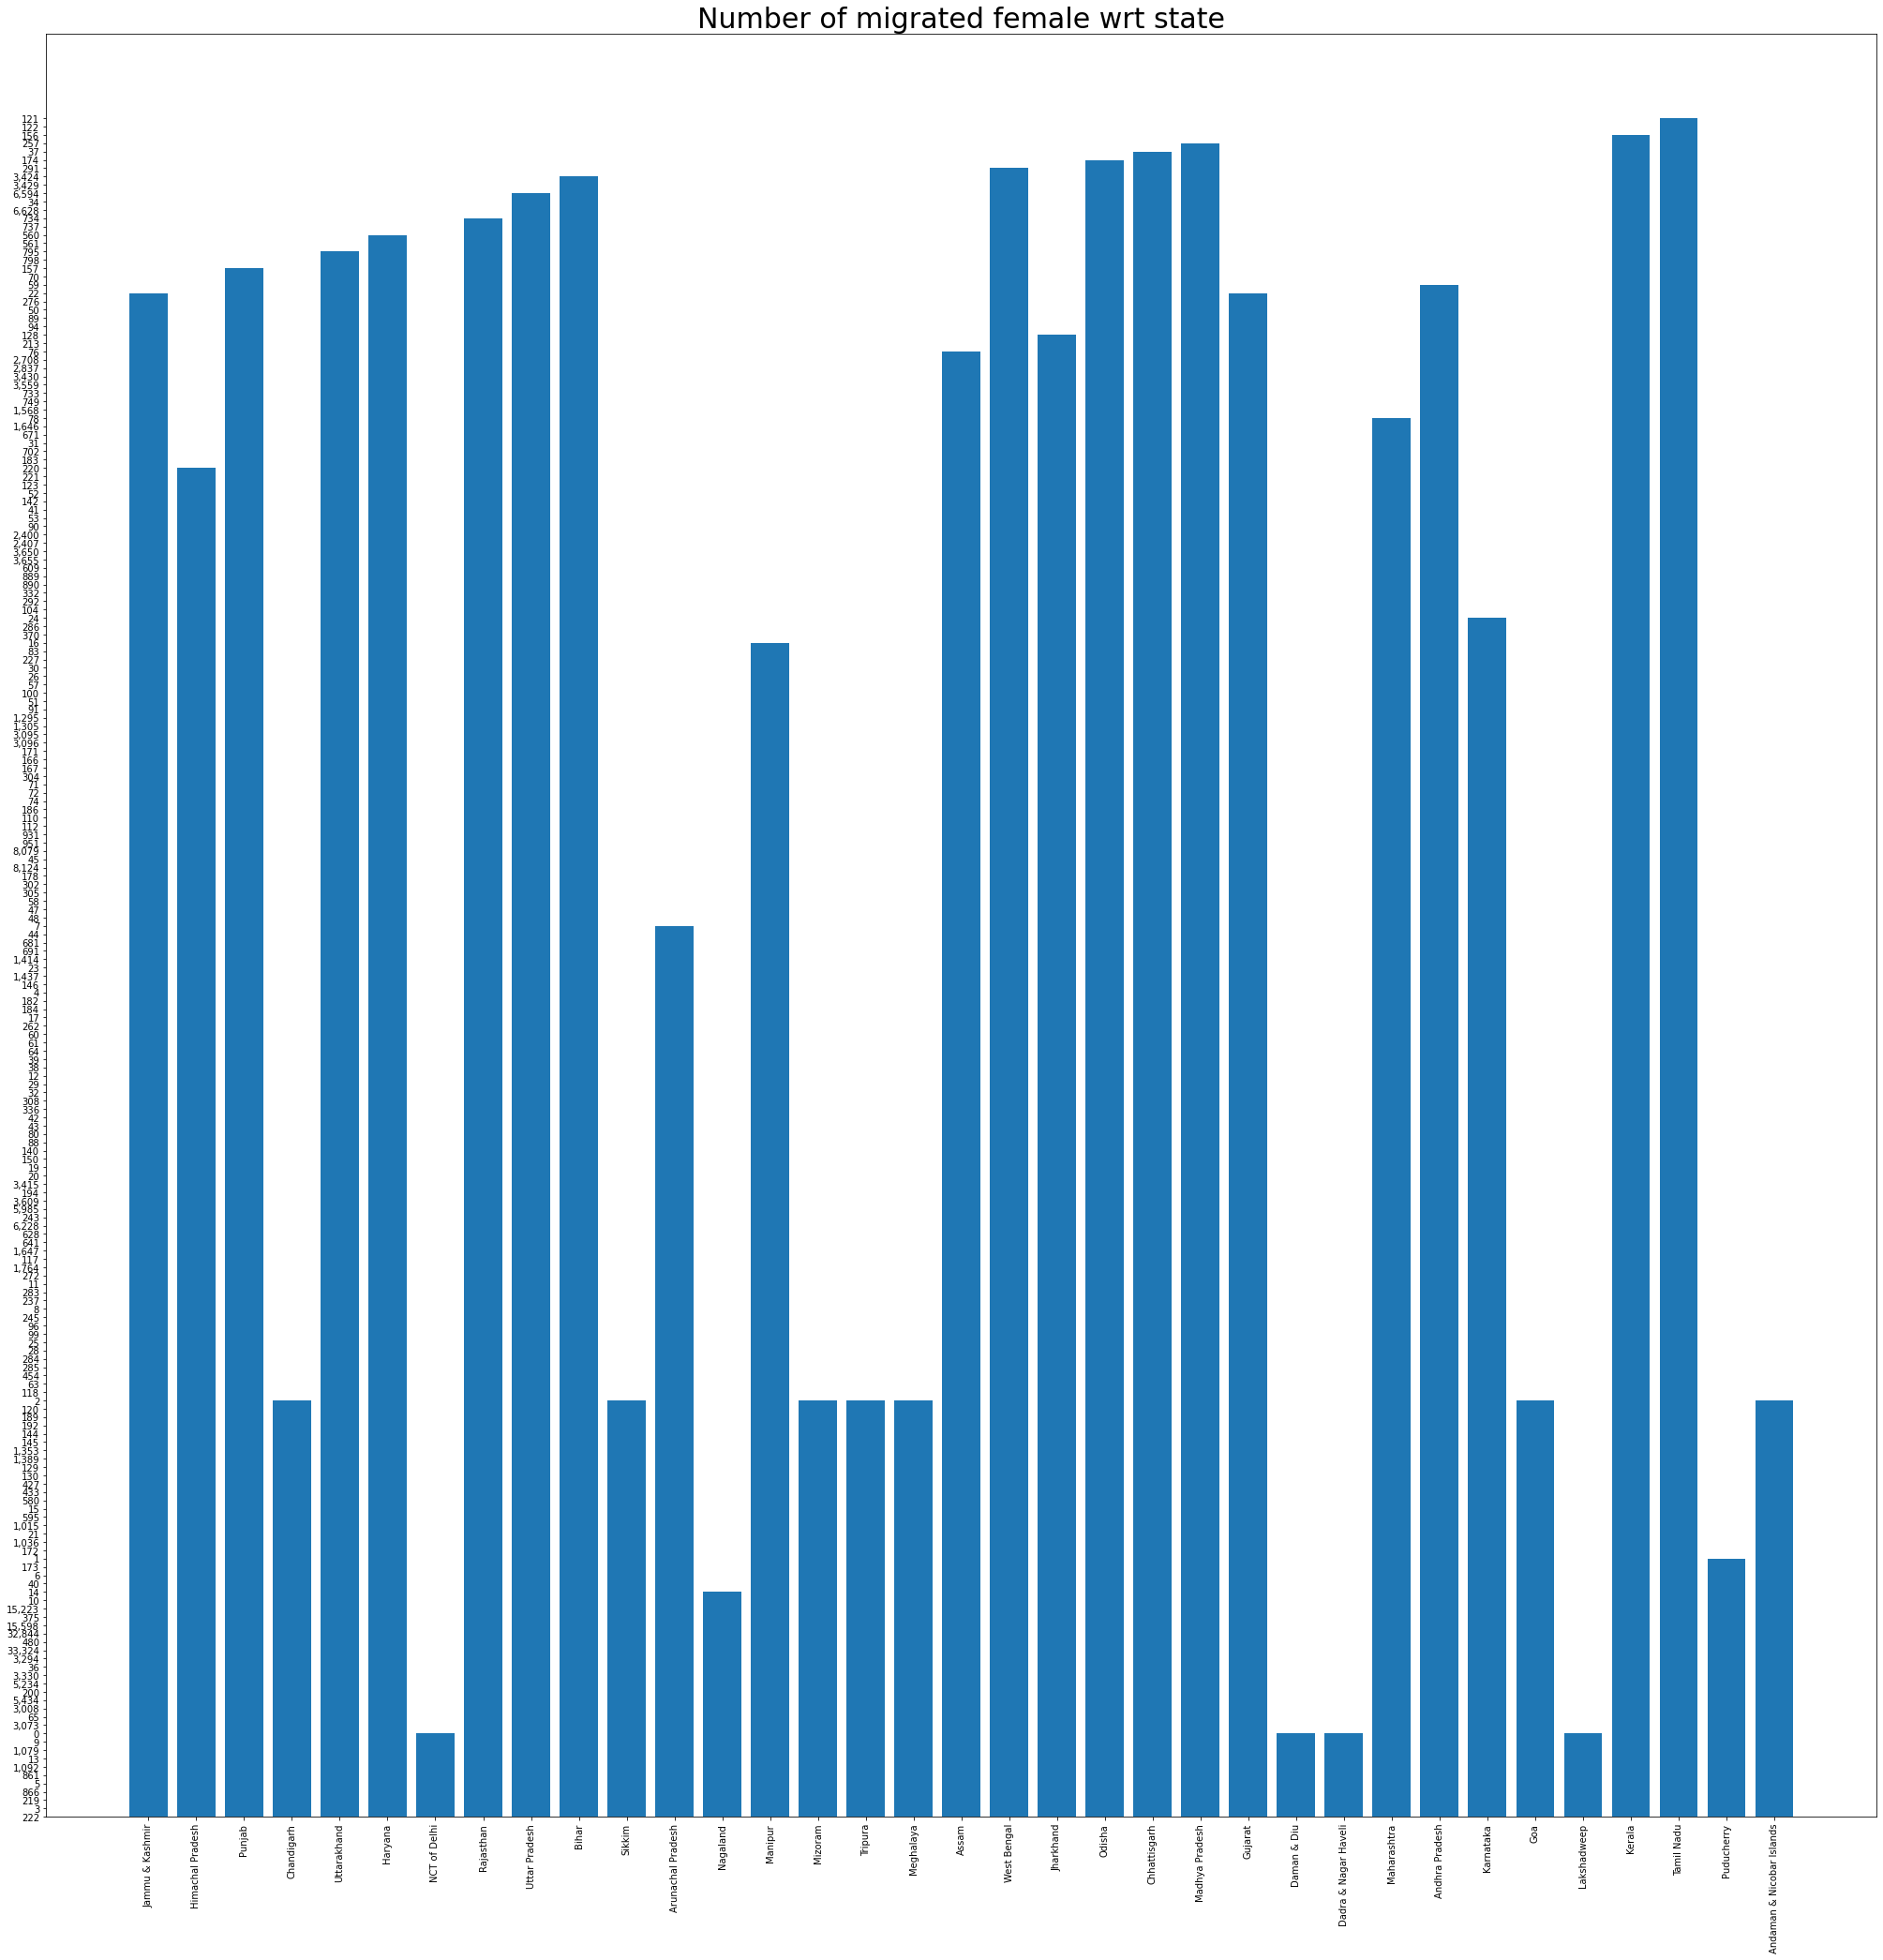

In [30]:
plt.figure(figsize=(35,35))
plt.bar(states,females)
plt.title("Number of migrated female wrt state",fontsize=30)
plt.xticks(rotation=90)
plt.show()

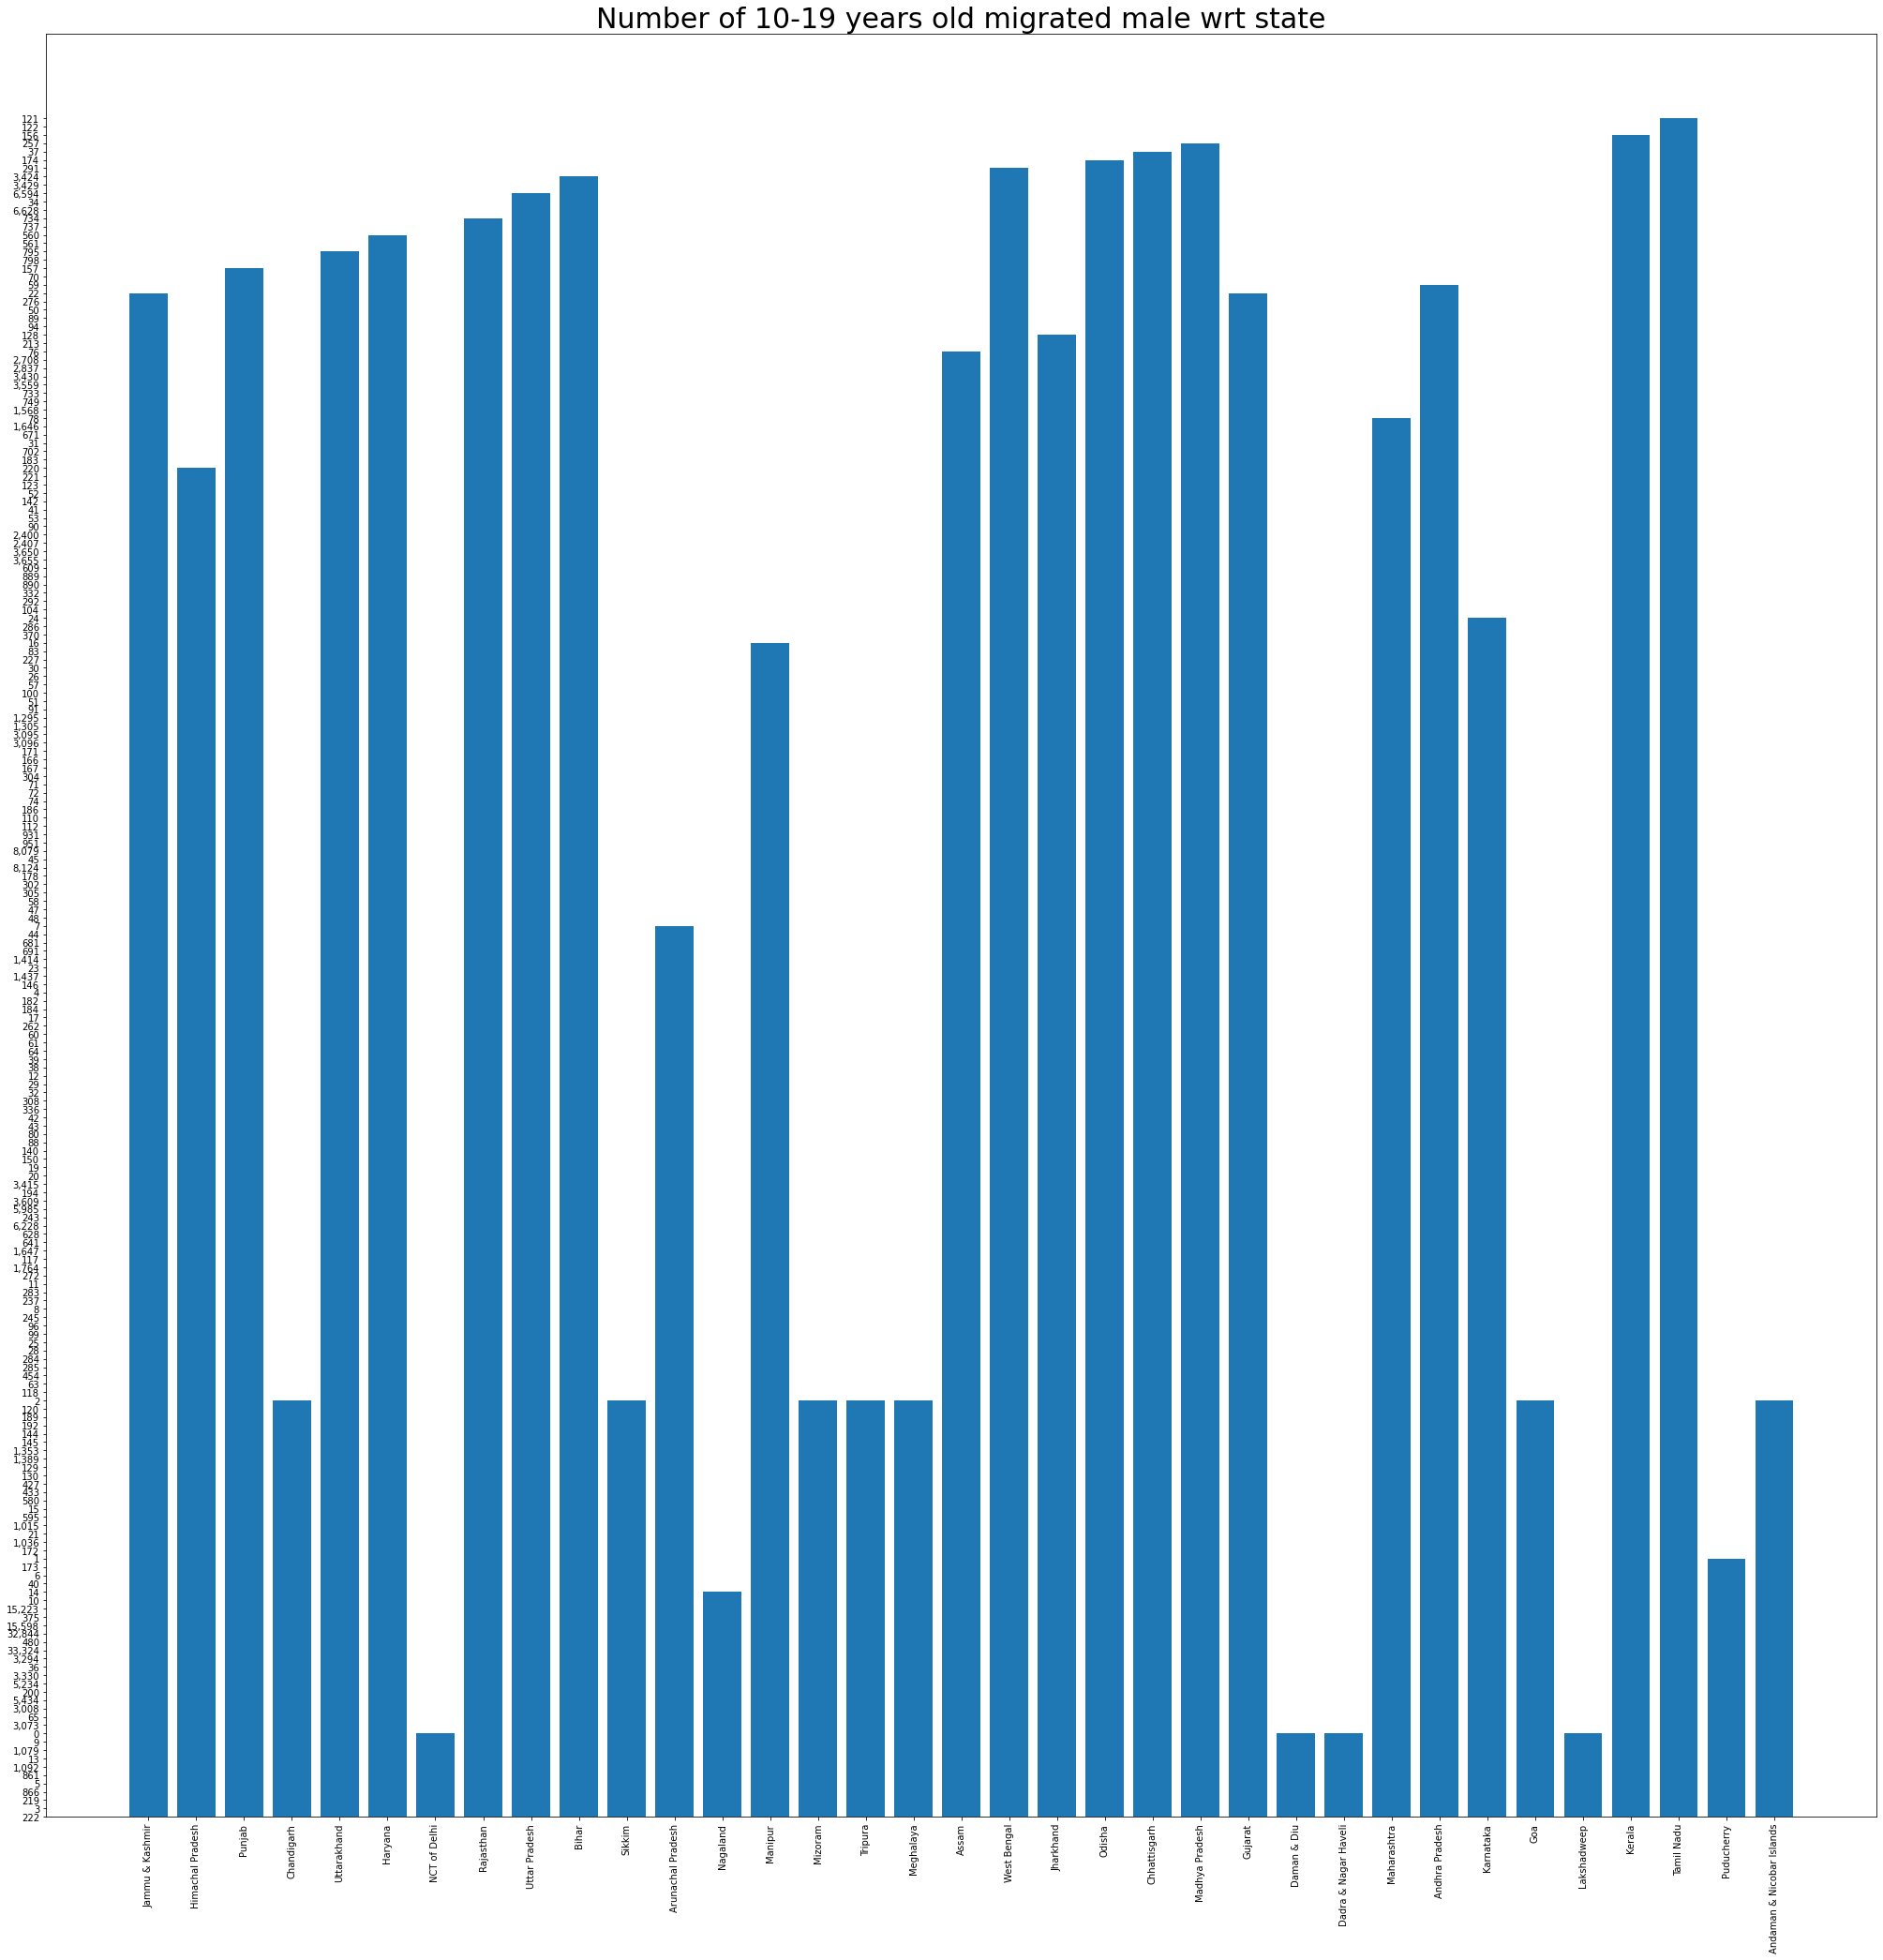

In [31]:
plt.figure(figsize=(35,35))
plt.bar(states,males10)
plt.title("Number of 10-19 years old migrated male wrt state",fontsize=30)
plt.xticks(rotation=90)
plt.show()

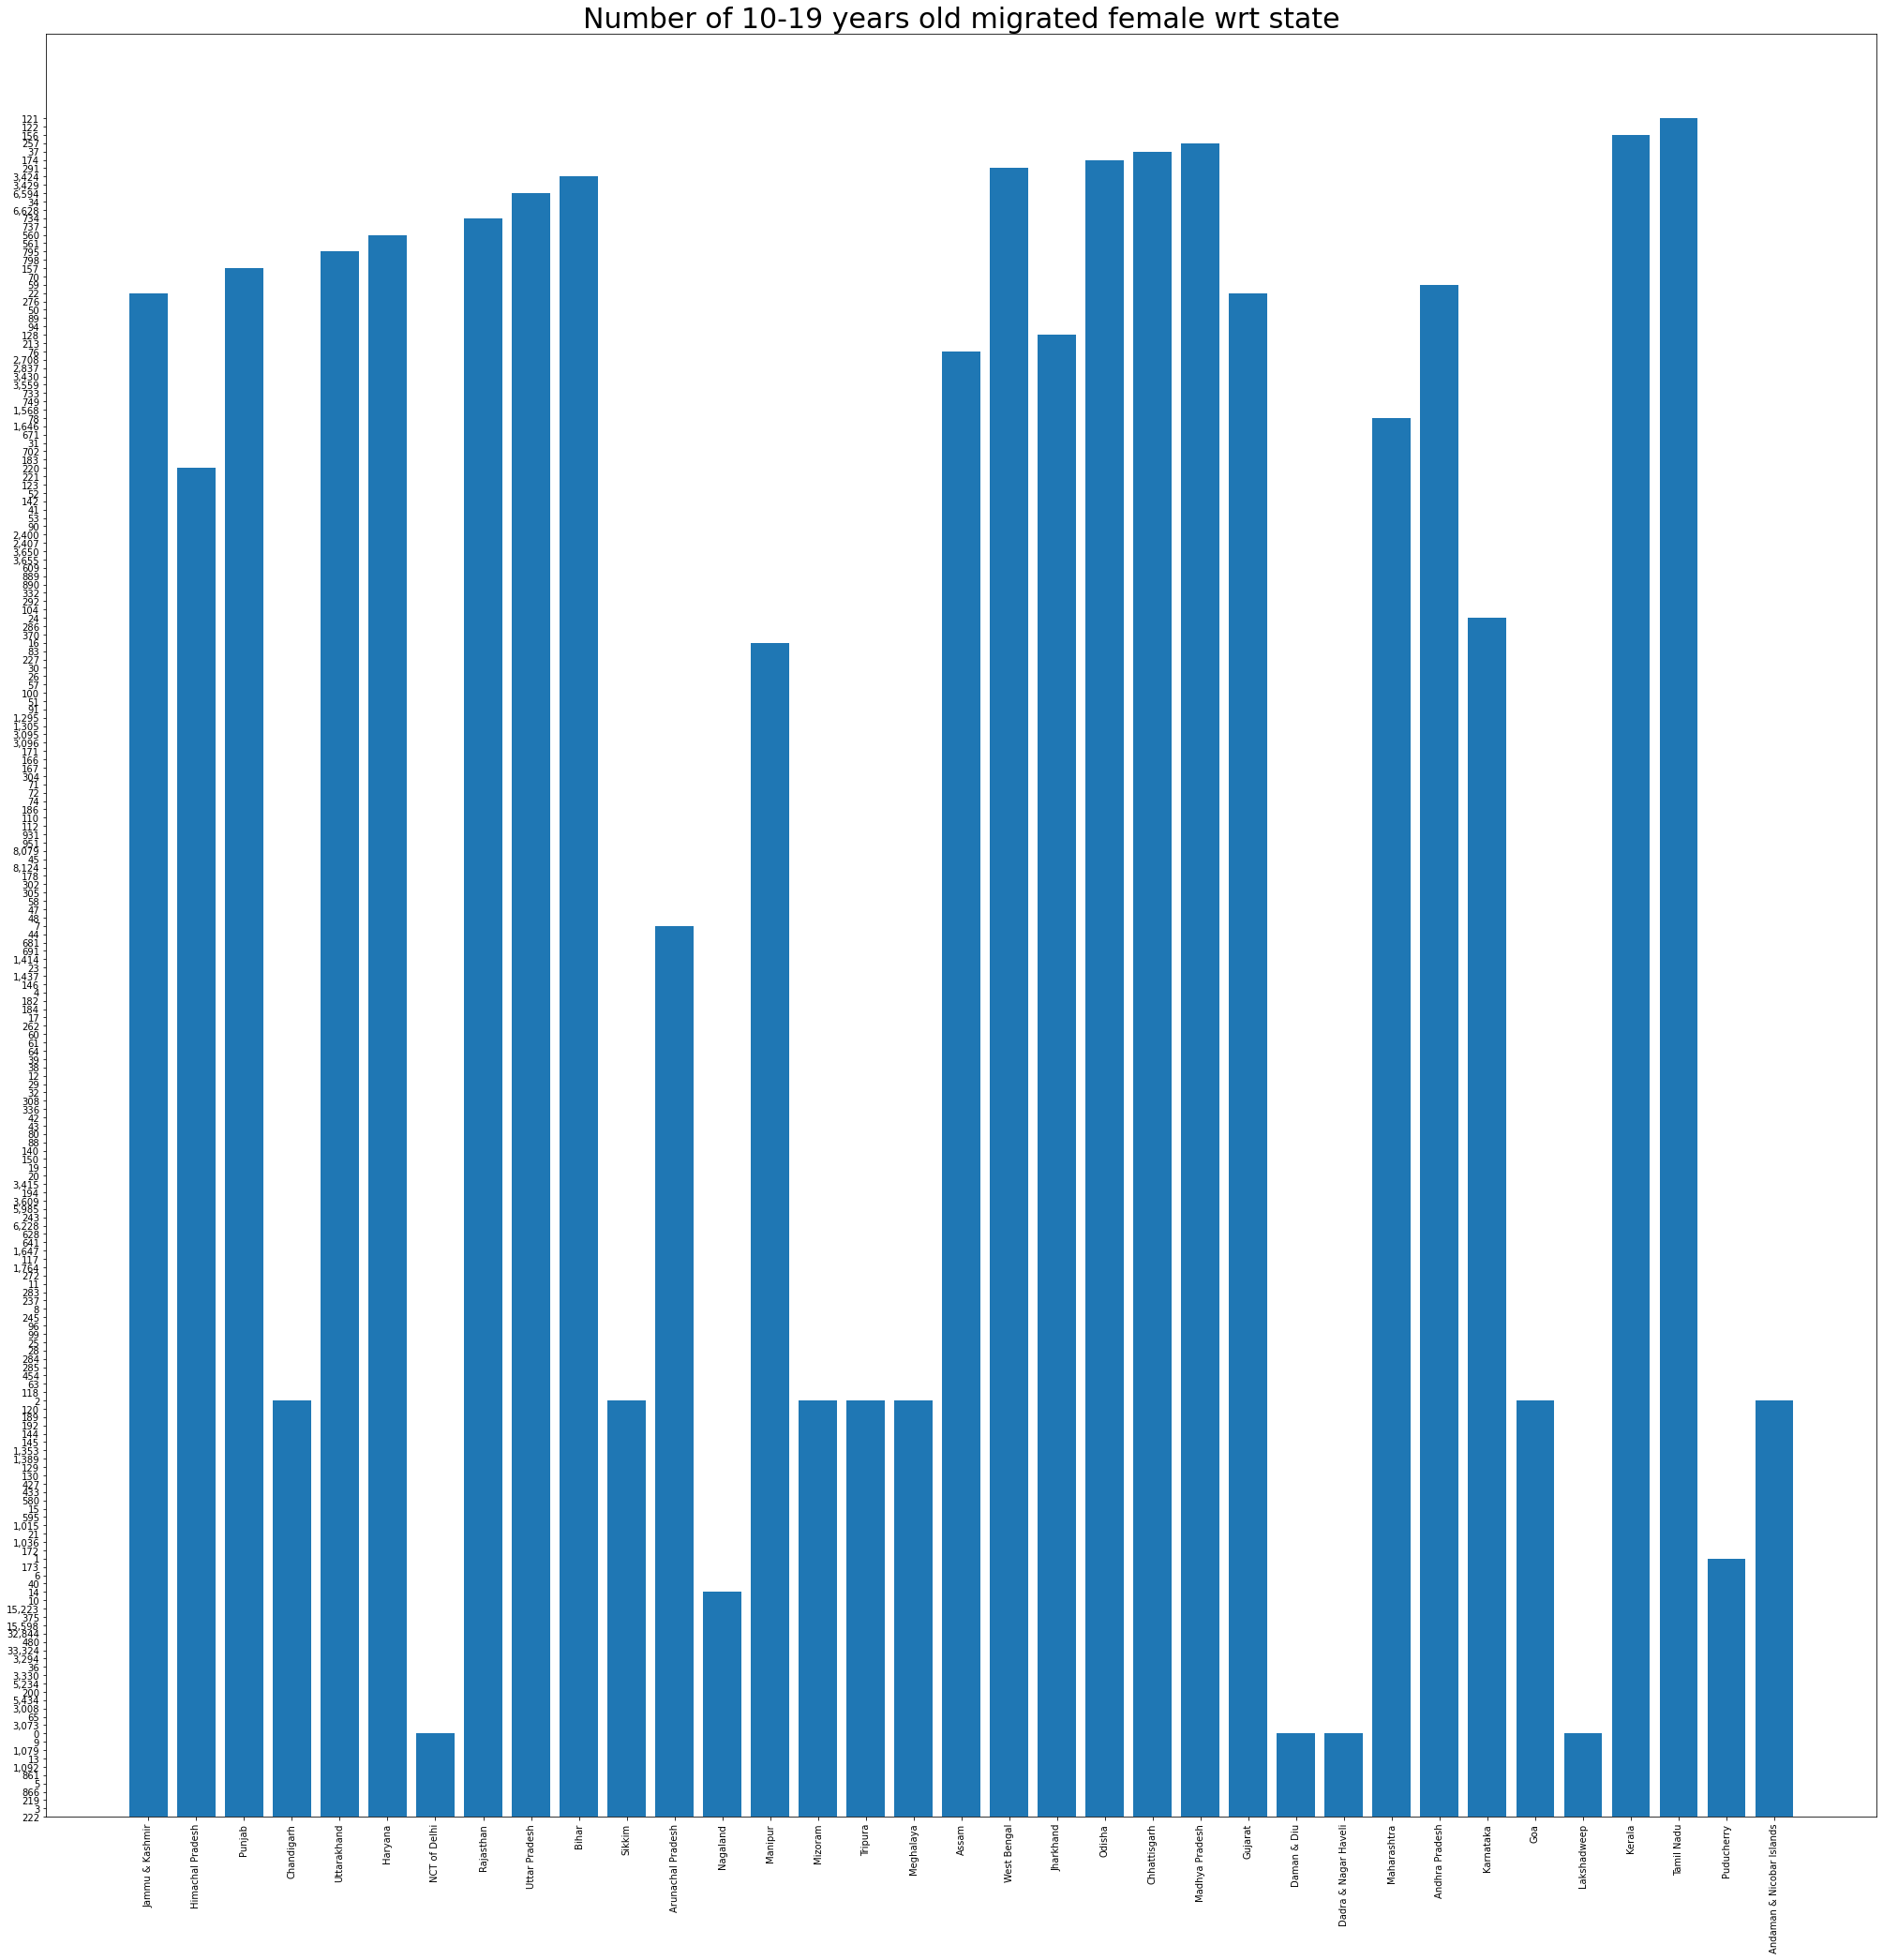

In [32]:
plt.figure(figsize=(35,35))
plt.bar(states,females10)
plt.title("Number of 10-19 years old migrated female wrt state",fontsize=30)
plt.xticks(rotation=90)
plt.show()

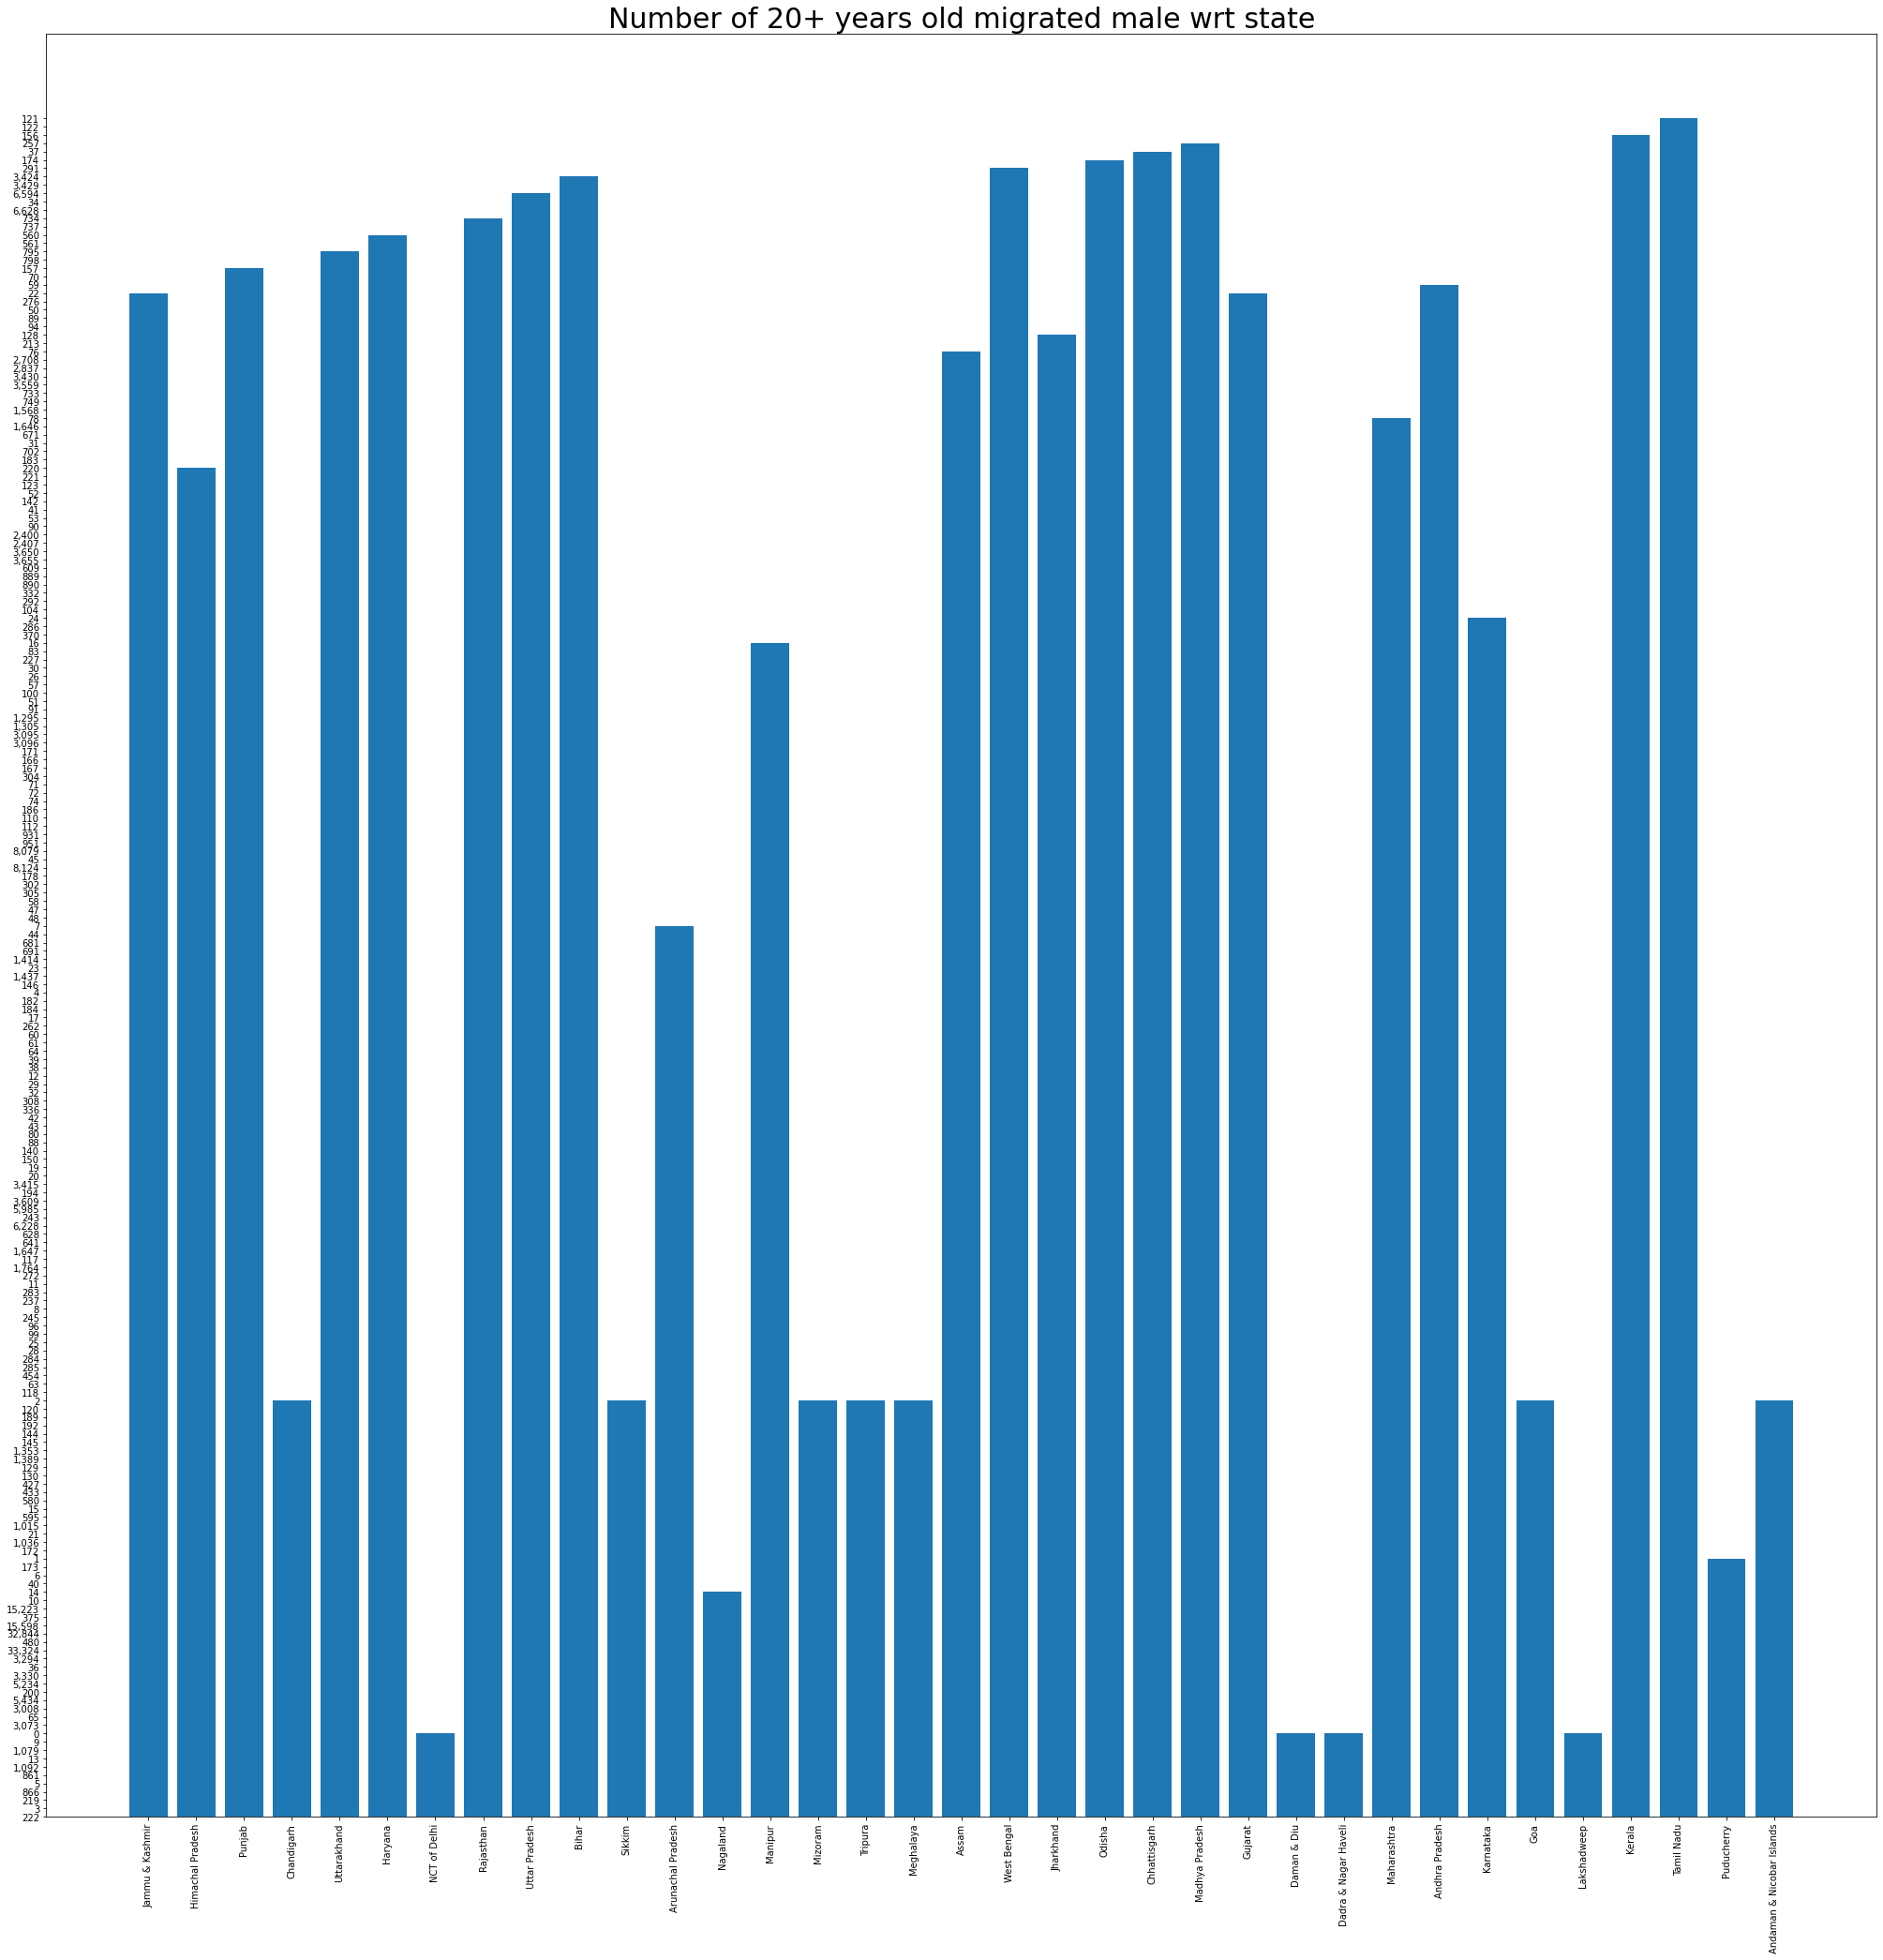

In [33]:
plt.figure(figsize=(35,35))
plt.bar(states,males20)
plt.title("Number of 20+ years old migrated male wrt state",fontsize=30)
plt.xticks(rotation=90)
plt.show()

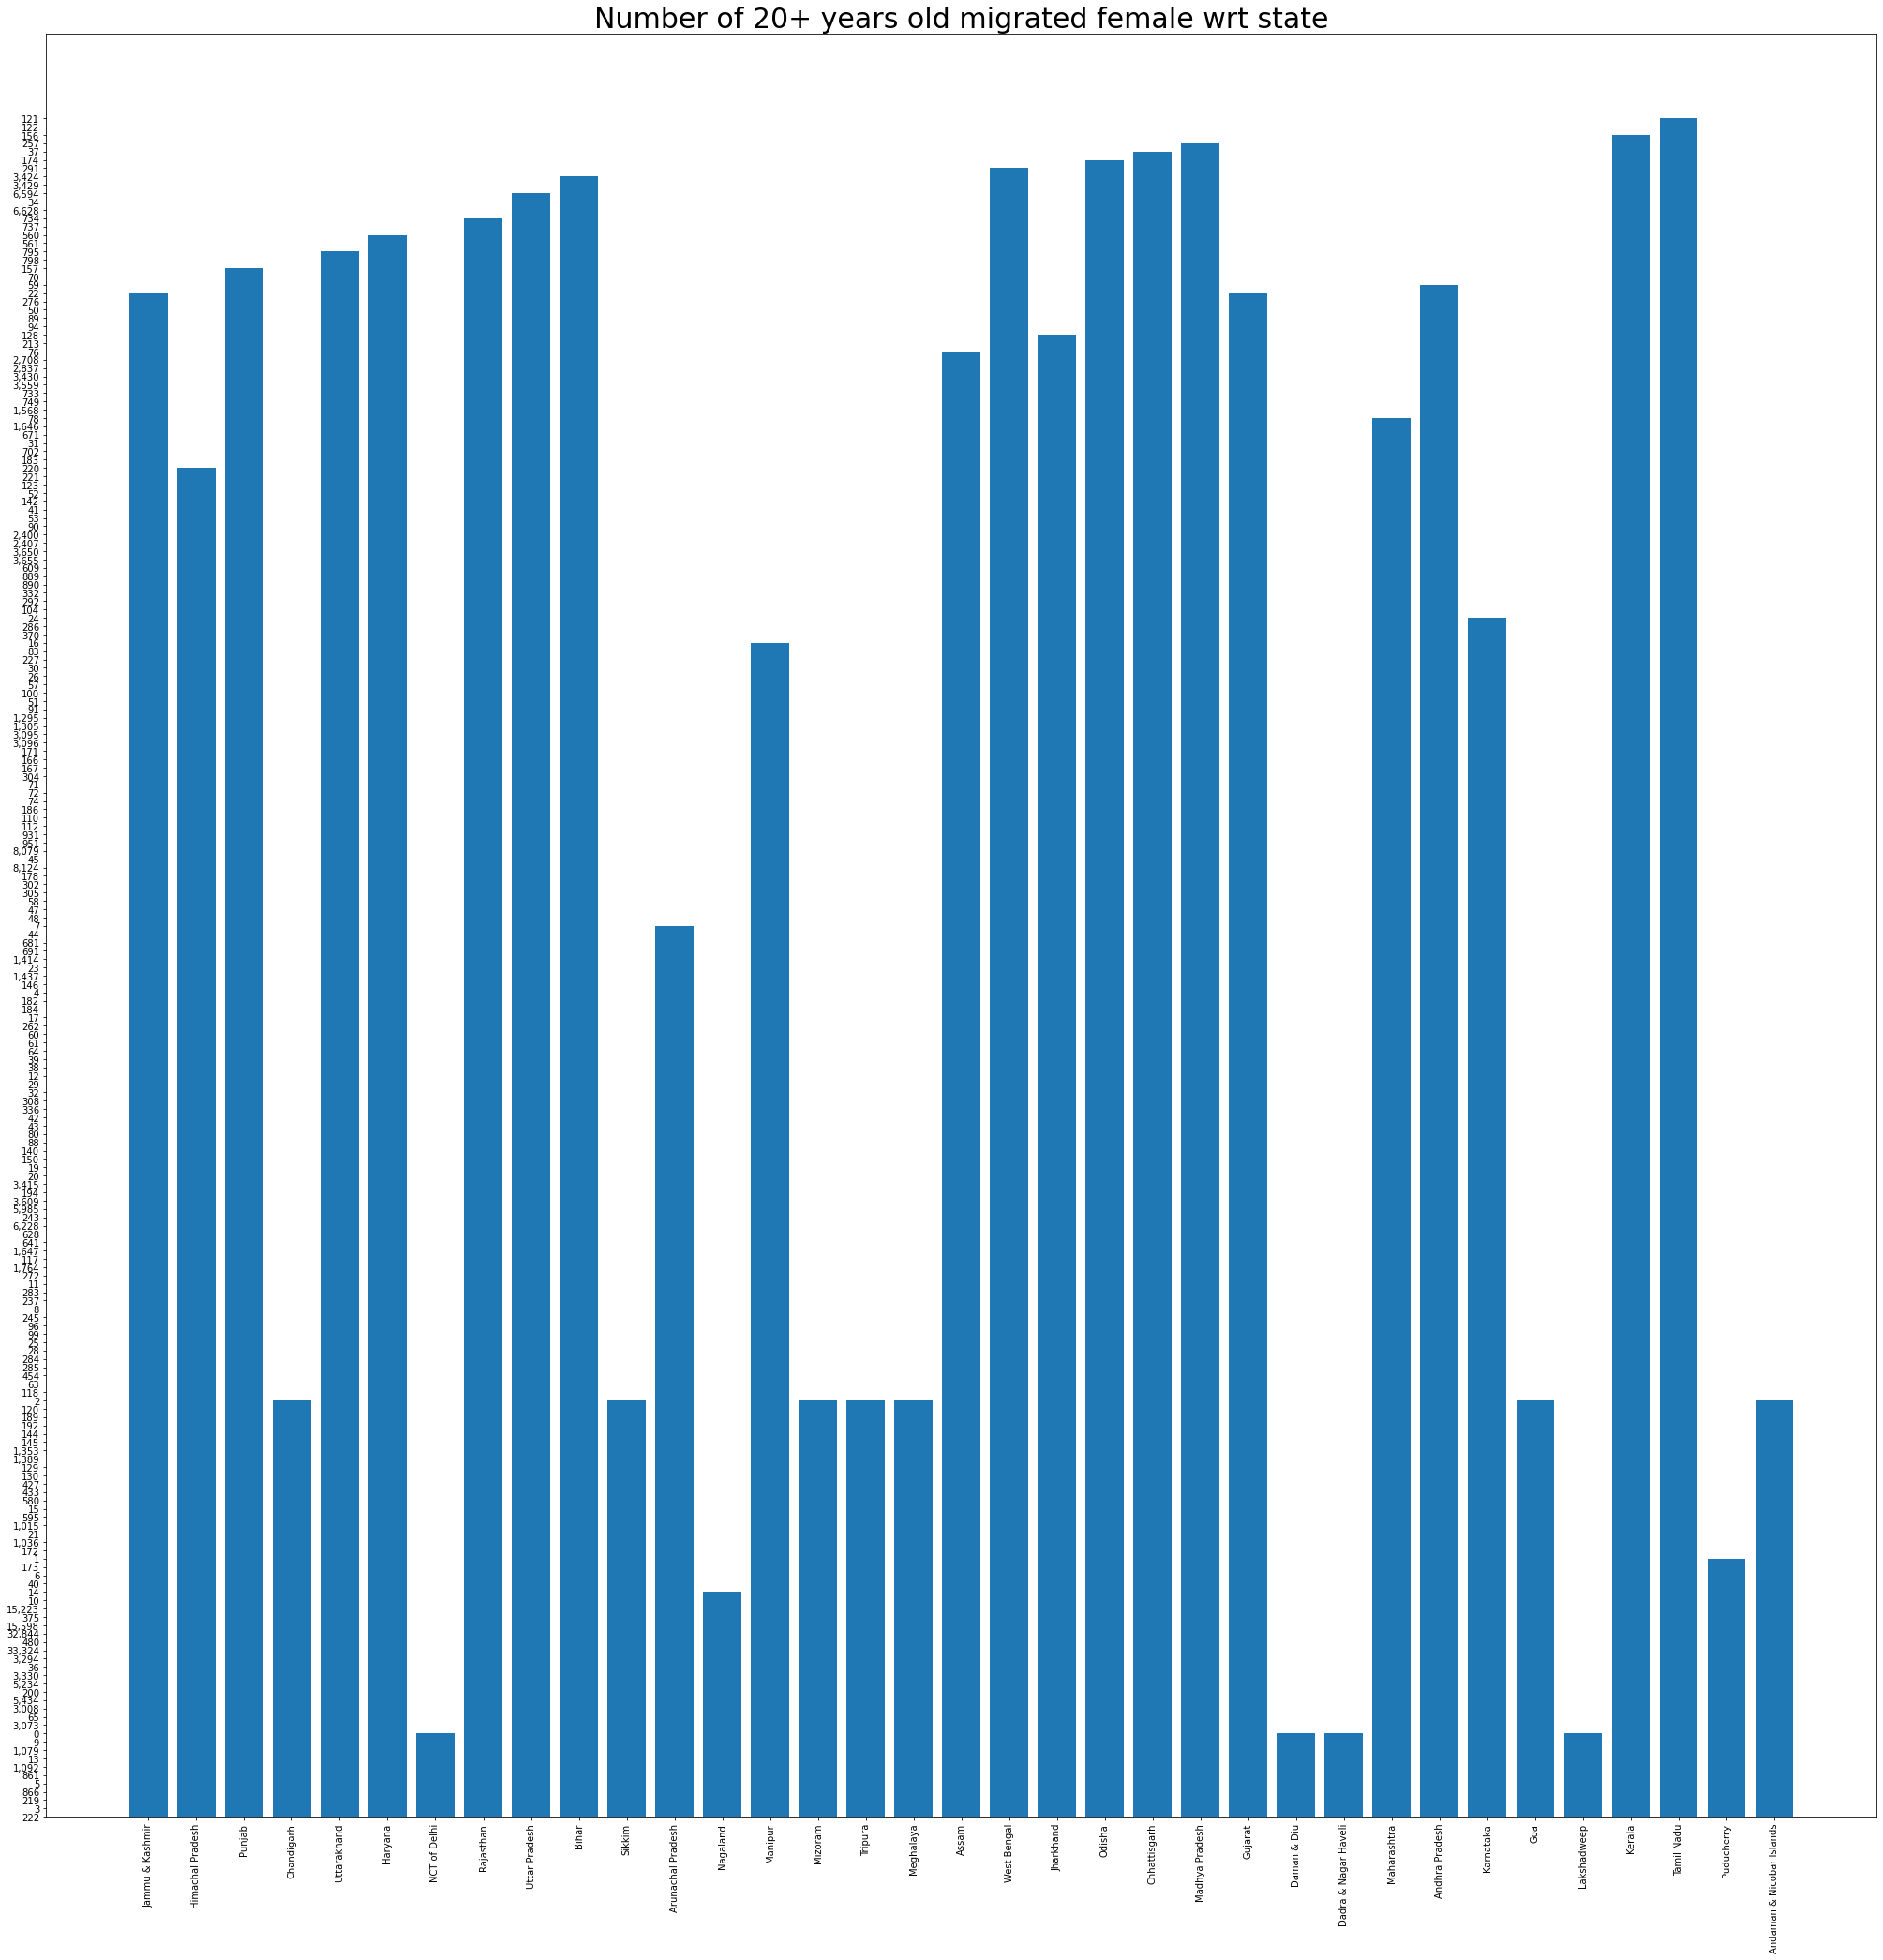

In [34]:
plt.figure(figsize=(35,35))
plt.bar(states,females20)
plt.title("Number of 20+ years old migrated female wrt state",fontsize=30)
plt.xticks(rotation=90)
plt.show()

From the above predictions and calculations we can say that the most people with low industrialization who migrate from one state to another in search of work is Bihar

In [35]:
males=list(males)
states=list(states)
S_State=[]
S_Male=[]
for i in range (0,len(states)):
    if states[i]=="Bihar":
        S_State.append(states[i])
        S_Male.append(males[i])

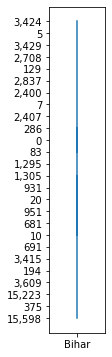

In [36]:
plt.figure(figsize=(1,6))
plt.plot(S_State,S_Male)
plt.xticks()
plt.yticks()
plt.show()